# INF2178 A3-Yixin Chang (1005991651)

### Load the dataset

In [1]:
# Student ID: 1005991651
# Student name: Yixin Chang
# Course code: INF2178

# Assignment 3

# import stuff here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
from bioinfokit.analys import stat
from scipy.stats import levene

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 841.3 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.3-py3-none-any.whl size=59056 sha256=a96c9b140e639a10c6bef325f45faca43c4f01c530483c081f72eb909d88b4b9
  Stored in directory: /root/.cache/pip/wheels/ac/67/a7/4e0b4172d5415933127e819d7d7080ae08a6220949ad2f6de5
Successfully built bioinfokit


In [2]:
# Load data and head data
df=pd.read_csv("INF2178_A3_data.csv")
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,totalhouseholdincome,incomeinthousands,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,140000.0,140.0,3
1,50.82,44.44,38.147,83.50,58.93,37.409,120000.0,120.0,3
2,40.68,28.57,28.108,40.41,32.81,29.312,90000.0,90.0,3
3,32.57,23.57,15.404,34.14,35.25,27.382,50000.0,50.0,2
4,31.98,19.65,18.727,32.84,23.60,26.977,55000.0,55.0,2


### Examine and clean the dataset

In [3]:
# Drop specified columns that will not be used
df = df.drop(['totalhouseholdincome', 'incomeinthousands'], axis=1)
df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup
0,36.58,39.54,33.822,49.37,50.10,40.533,3
1,50.82,44.44,38.147,83.50,58.93,37.409,3
2,40.68,28.57,28.108,40.41,32.81,29.312,3
3,32.57,23.57,15.404,34.14,35.25,27.382,2
4,31.98,19.65,18.727,32.84,23.60,26.977,2


In [4]:
# Check if there are any missing values in the entire DataFrame
if df.isna().values.any():
    print("There are missing values in the DataFrame.")
    # check for missing values in the DataFrame
    missing_values = df.isna().sum()
    # display the count of missing values for each column
    print(missing_values)
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


### EDA

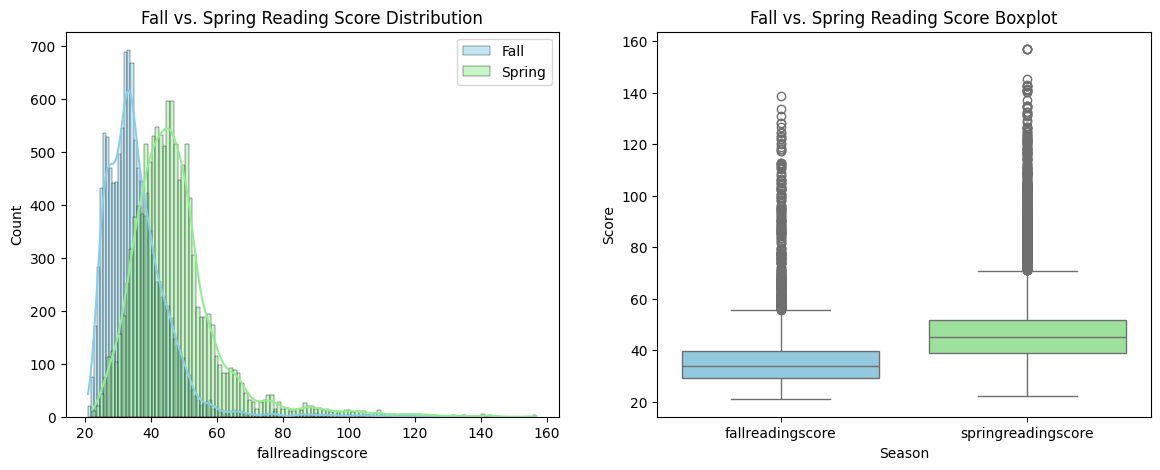

In [5]:
# Compare distribution for Reading Scores by Seasons
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for fall/spring reading scores
sns.histplot(df, x="fallreadingscore", kde=True, color="skyblue", ax=axs[0], label="Fall")
sns.histplot(df, x="springreadingscore", kde=True, color="lightgreen", ax=axs[0], label="Spring")
axs[0].set_title("Fall vs. Spring Reading Score Distribution")
axs[0].legend()

# Boxplot for fall/spring reading scores
sns.boxplot(data=df[['fallreadingscore', 'springreadingscore']].melt(var_name="Season", value_name="Score"),
            x="Season", y="Score", hue="Season", palette=["skyblue", "lightgreen"])
axs[1].set_title("Fall vs. Spring Reading Score Boxplot")

plt.show()

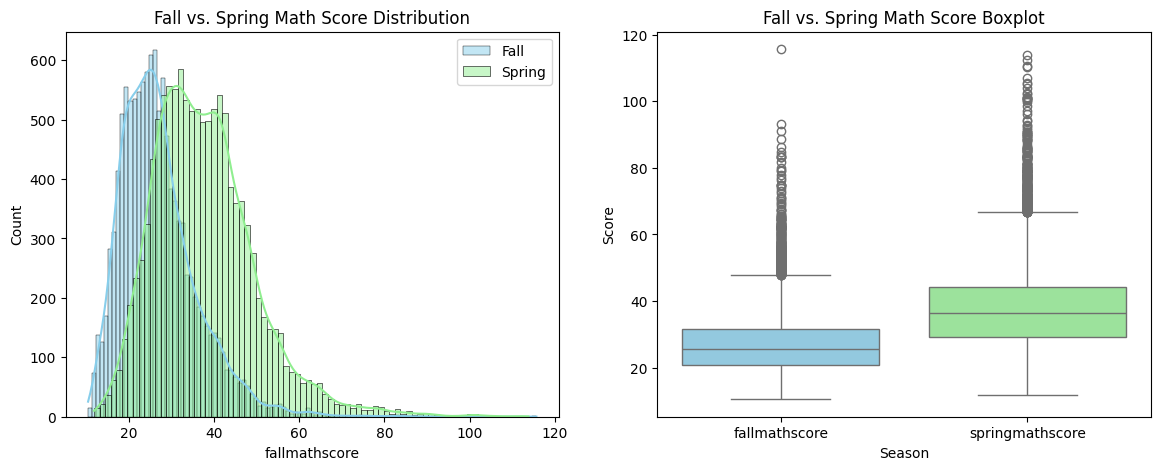

In [6]:
# Compare distribution for Math Scores by Seasons
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for fall/spring math scores
sns.histplot(df, x="fallmathscore", kde=True, color="skyblue", ax=axs[0], label="Fall")
sns.histplot(df, x="springmathscore", kde=True, color="lightgreen", ax=axs[0], label="Spring")
axs[0].set_title("Fall vs. Spring Math Score Distribution")
axs[0].legend()

# Boxplot for fall/spring math scores
sns.boxplot(data=df[['fallmathscore', 'springmathscore']].melt(var_name="Season", value_name="Score"),
            x="Season", y="Score", hue="Season", palette=["skyblue", "lightgreen"], ax=axs[1])
axs[1].set_title("Fall vs. Spring Math Score Boxplot")

plt.show()

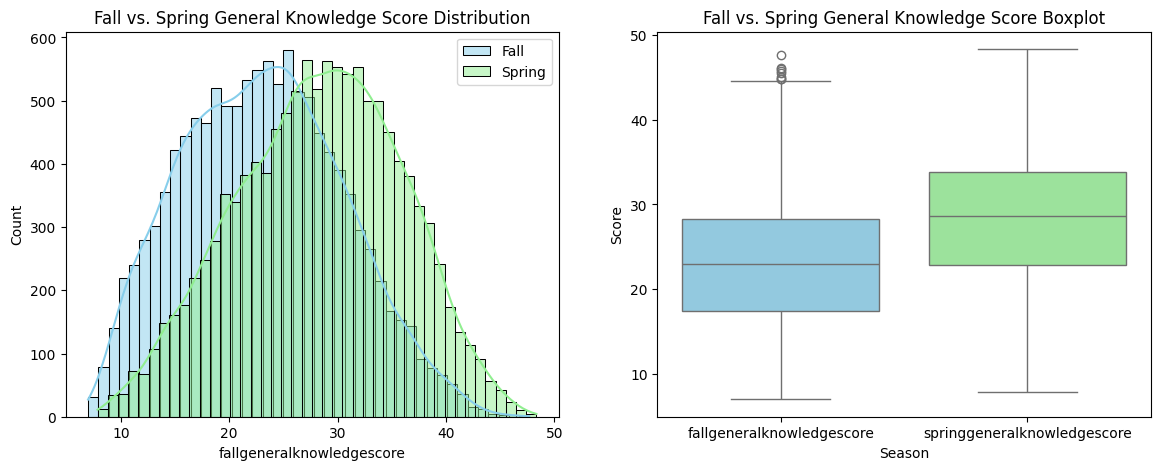

In [7]:
# Compare distribution for General Knowledge Scores by Seasons
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for fall/spring general knowledge scores
sns.histplot(df, x="fallgeneralknowledgescore", kde=True, color="skyblue", ax=axs[0], label="Fall")
sns.histplot(df, x="springgeneralknowledgescore", kde=True, color="lightgreen", ax=axs[0], label="Spring")
axs[0].set_title("Fall vs. Spring General Knowledge Score Distribution")
axs[0].legend()

# Boxplot for fall/spring general knowledge scores
sns.boxplot(data=df[['fallgeneralknowledgescore', 'springgeneralknowledgescore']].melt(var_name="Season", value_name="Score"),
            x="Season", y="Score", hue="Season", palette=["skyblue", "lightgreen"], ax=axs[1])
axs[1].set_title("Fall vs. Spring General Knowledge Score Boxplot")

plt.show()

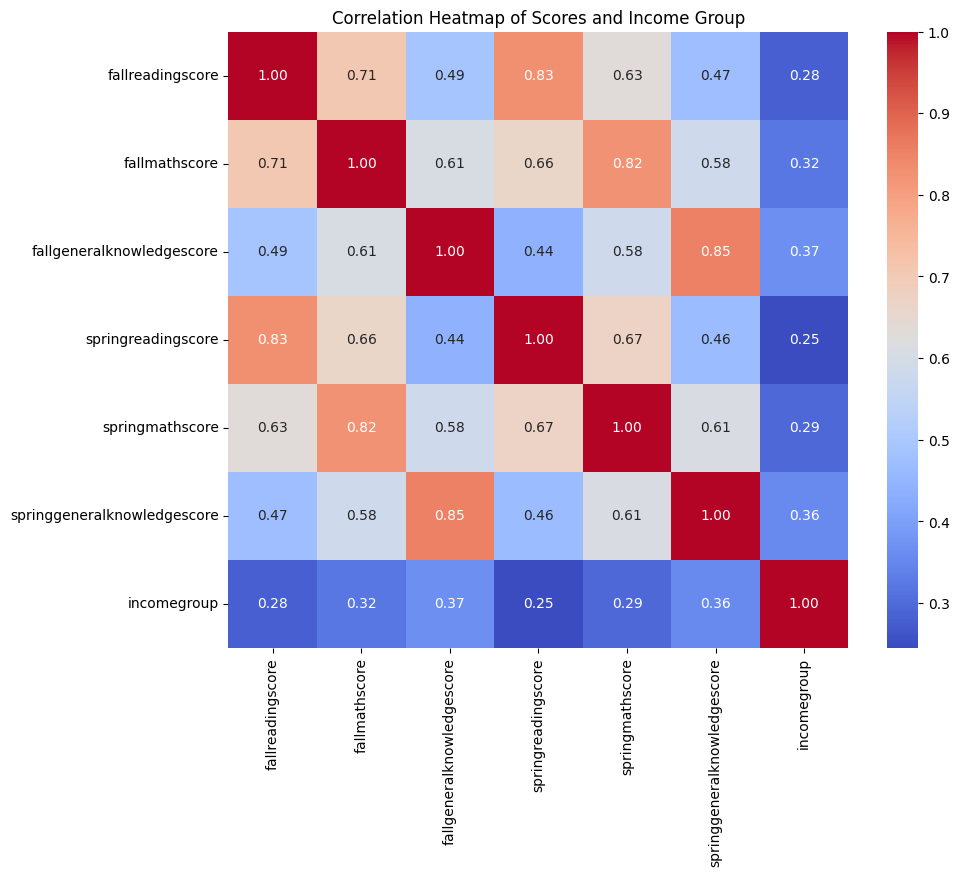

In [8]:
# Calculating the correlation matrix for the dataset
correlation_matrix = df.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Scores and Income Group')
plt.show()

In [9]:
# Add two new columns to represent changes of reading/math scores
df['ReadingDiff'] = df['springreadingscore'] - df['fallreadingscore']
df['MathDiff'] = df['springmathscore'] - df['fallmathscore']

df.head()

,fallreadingscore,fallmathscore,fallgeneralknowledgescore,springreadingscore,springmathscore,springgeneralknowledgescore,incomegroup,ReadingDiff,MathDiff
0,36.58,39.54,33.822,49.37,50.10,40.533,3,12.79,10.56
1,50.82,44.44,38.147,83.50,58.93,37.409,3,32.68,14.49
2,40.68,28.57,28.108,40.41,32.81,29.312,3,-0.27,4.24
3,32.57,23.57,15.404,34.14,35.25,27.382,2,1.57,11.68
4,31.98,19.65,18.727,32.84,23.60,26.977,2,0.86,3.95


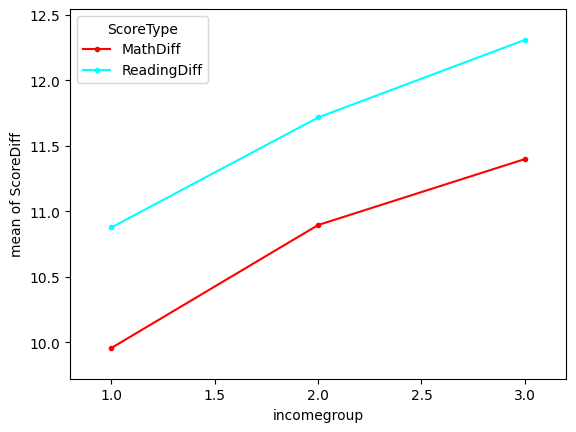

In [10]:
# Interaction Plot

# Melt the DataFrame
df_melted = df.melt(id_vars=['incomegroup'],
                    value_vars=['ReadingDiff', 'MathDiff'],
                    var_name='ScoreType',
                    value_name='ScoreDiff')

fig = interaction_plot(x=df_melted['incomegroup'],trace=df_melted['ScoreType'],response=df_melted['ScoreDiff'])
plt.show()

### ANCOVA - Reading Score Growth
*   Dependent variable: ReadingDiff
*   Independent variable: incomegroup
*   Covariate: fallgeneralknowledgescore





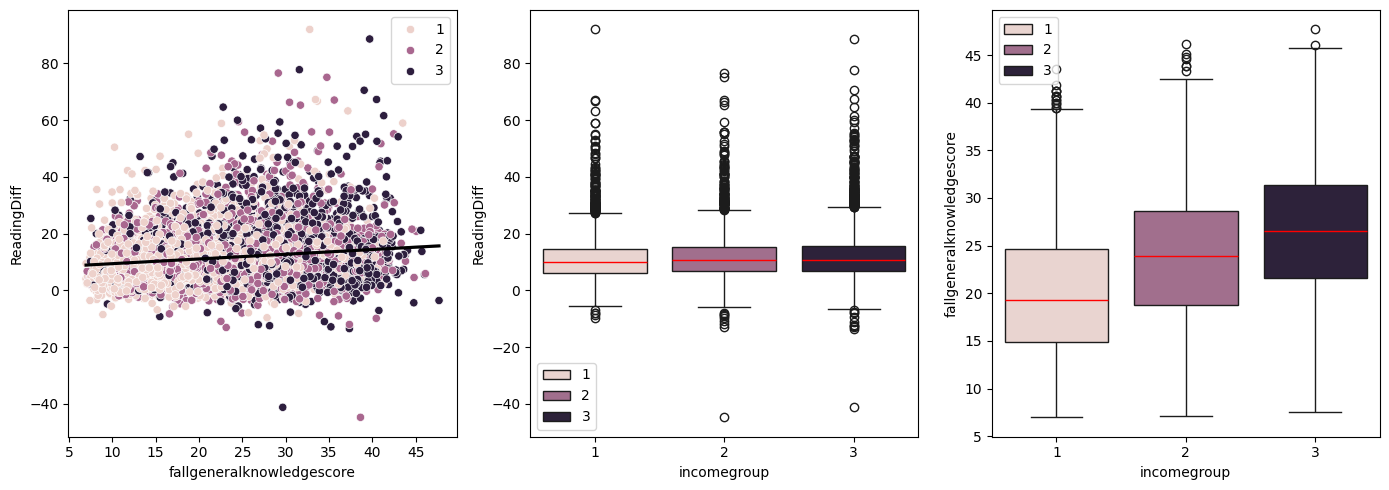

In [11]:
# ReadingDiff
fig, axs = plt.subplots(ncols=3, figsize=(14, 5))
# Scatter plot: relationship between general knowledge scores in the fall and the difference in reading scores
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="ReadingDiff", hue=df.incomegroup.tolist(), ax=axs[0])
# Add a regression line
sns.regplot(data=df, x="fallgeneralknowledgescore", y="ReadingDiff", scatter=False, color="black", ax=axs[0])
# Boxplot: ReadingDiff vs incomegroup
sns.boxplot(data=df, x="incomegroup", y="ReadingDiff", hue=df.incomegroup.tolist(), ax=axs[1], medianprops={'color': 'red'})
# Boxplot: fallgeneralknowledgescore vs incomegroup
sns.boxplot(data=df, x="incomegroup", y="fallgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[2], medianprops={'color': 'red'})
plt.tight_layout()
plt.show()

In [12]:
# Perform the ANCOVA
rd_model = ols('ReadingDiff ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

# Print the summary of the model
print(rd_model.summary())

                            OLS Regression Results                            
Dep. Variable:            ReadingDiff   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     95.49
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.52e-61
Time:                        03:09:04   Log-Likelihood:                -41730.
No. Observations:               11933   AIC:                         8.347e+04
Df Residuals:                   11929   BIC:                         8.350e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [13]:
# Check for assumption: Homogeneity of Regression Slopes
rs_model_check = ols('ReadingDiff ~ C(incomegroup) * fallgeneralknowledgescore', data=df).fit()
print(rs_model_check.summary())

                            OLS Regression Results                            
Dep. Variable:            ReadingDiff   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     62.07
Date:                Sun, 24 Mar 2024   Prob (F-statistic):           4.15e-64
Time:                        03:09:05   Log-Likelihood:                -41719.
No. Observations:               11933   AIC:                         8.345e+04
Df Residuals:                   11927   BIC:                         8.349e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

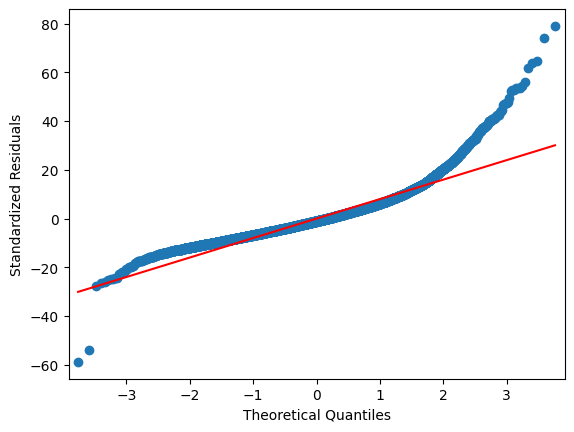

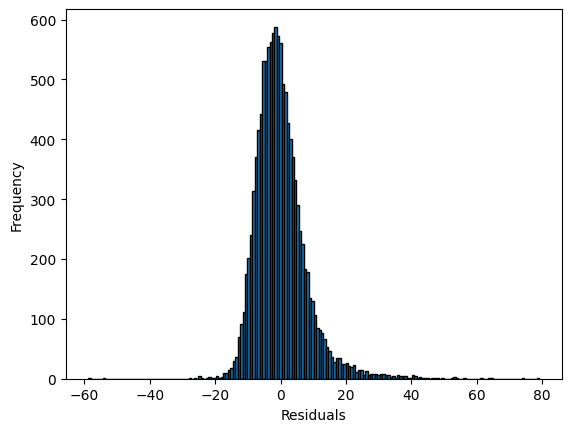

In [14]:
# Assumption 1: rd_model.resid are standardized residuals obtained from ANCOVA
sm.qqplot(rd_model.resid, line='s')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram
plt.hist(rd_model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [15]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(rd_model.resid)
print(w,pvalue)

0.8996317386627197 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
# Assuption 2: Homogeneity of variances

# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df, res_var='ReadingDiff', xfac_var='incomegroup')
print(res.levene_summary)

                 Parameter   Value
0      Test statistics (W)  19.728
1  Degrees of freedom (Df)   2.000
2                  p value   0.000


### ANCOVA - Math Score Growth
*   Dependent variable: MathDiff
*   Independent variable: incomegroup
*   Covariate: fallgeneralknowledgescore


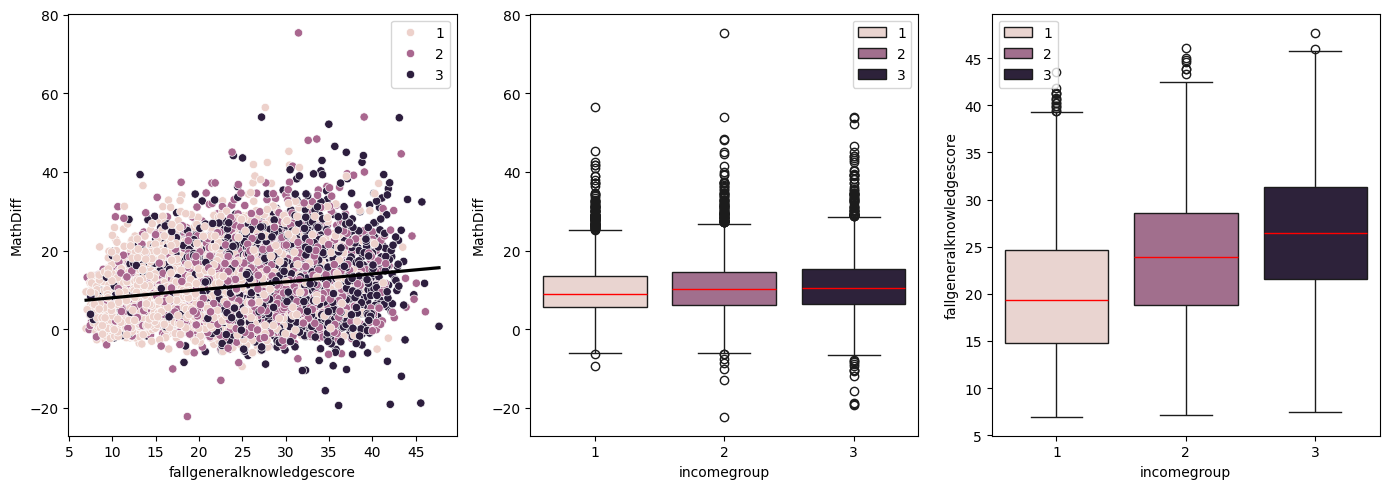

In [17]:
# MathDiff
fig, axs = plt.subplots(ncols=3, figsize=(14, 5))
# Scatter plot: relationship between general knowledge scores in the fall and the difference in math scores
sns.scatterplot(data=df, x="fallgeneralknowledgescore", y="MathDiff", hue=df.incomegroup.tolist(), ax=axs[0])
# Add a regression line
sns.regplot(data=df, x="fallgeneralknowledgescore", y="MathDiff", scatter=False, color="black", ax=axs[0])
# Boxplot: MathDiff vs incomegroup
sns.boxplot(data=df, x="incomegroup", y="MathDiff", hue=df.incomegroup.tolist(), ax=axs[1], medianprops={'color': 'red'})
# Boxplot: fallgeneralknowledgescore vs incomegroup
sns.boxplot(data=df, x="incomegroup", y="fallgeneralknowledgescore", hue=df.incomegroup.tolist(), ax=axs[2], medianprops={'color': 'red'})
plt.tight_layout()
plt.show()

In [18]:
# Perform the ANCOVA
m_model = ols('MathDiff ~ C(incomegroup) + fallgeneralknowledgescore', data=df).fit()

# Print the summary of the model
print(m_model.summary())

                            OLS Regression Results                            
Dep. Variable:               MathDiff   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     200.0
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          1.36e-126
Time:                        03:09:13   Log-Likelihood:                -39610.
No. Observations:               11933   AIC:                         7.923e+04
Df Residuals:                   11929   BIC:                         7.926e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [19]:
# Check for assumption: Homogeneity of Regression Slopes
m_model_check = ols('MathDiff ~ C(incomegroup) * fallgeneralknowledgescore', data=df).fit()
print(m_model_check.summary())

                            OLS Regression Results                            
Dep. Variable:               MathDiff   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     124.4
Date:                Sun, 24 Mar 2024   Prob (F-statistic):          7.91e-129
Time:                        03:09:13   Log-Likelihood:                -39600.
No. Observations:               11933   AIC:                         7.921e+04
Df Residuals:                   11927   BIC:                         7.926e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

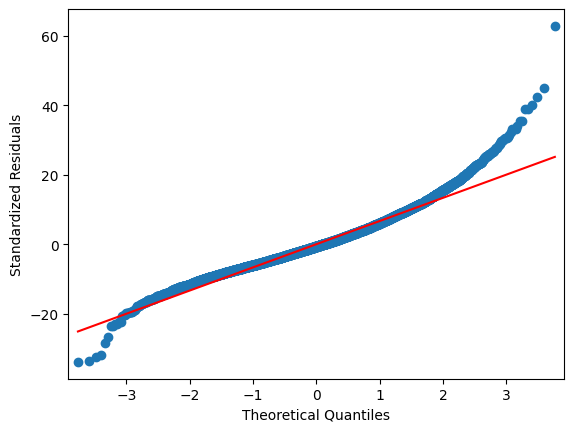

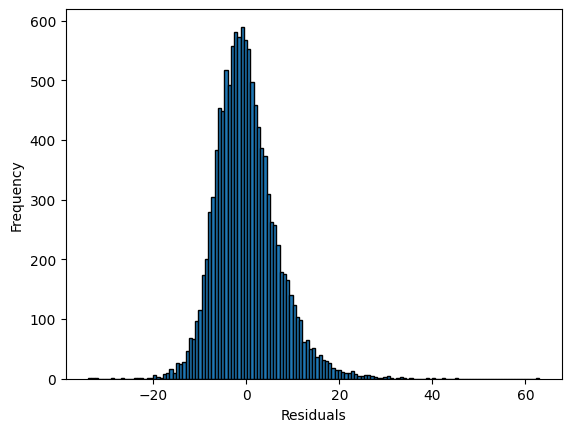

In [20]:
# Assumption 1: m_model_resid are standardized residuals obtained from ANCOVA
sm.qqplot(m_model.resid, line='s')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# Histogram
plt.hist(m_model.resid, bins='auto', histtype='bar', ec='k')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [21]:
# Assumption 1: residuals are normally distributed: Shapiro Wilk test
w, pvalue = stats.shapiro(m_model.resid)
print(w,pvalue)

0.9664044380187988 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [22]:
# Assuption 2: Homogeneity of variances

# Levene's test if the sample data is not normal distribution
res = stat()
res.levene(df=df, res_var='MathDiff', xfac_var='incomegroup')
print(res.levene_summary)

                 Parameter    Value
0      Test statistics (W)  22.2152
1  Degrees of freedom (Df)   2.0000
2                  p value   0.0000
